## Realizado por J. A. Osorio

In [51]:
from scipy import stats
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

def train_values(m, mean1, mean2, desv1, desv2):
    """Metodo para generar m datos de entrenamiento
    input: 
        m - # de valores a generar,
        mean1, mean2. desv1, desv2 - media y desviacion de la variable aleatoria asociada a la caracteristica 1 (2)
    output:
        X - Caracteristicas
        y - Datos de entrenamiento
    """
    #distribucion normal para ambas clases
    f1 = stats.norm(loc = mean1, scale = desv1)
    f2 = stats.norm(loc = mean2, scale = desv2)
    
    #variable aleatoria para ambas clases
    random_1 = f1.rvs(m)
    random_2 = f2.rvs(m)
    
    #se inicializa un vector vacio
    X = np.zeros(2*m)
    #los primeros m datos corresponderan a la caracteristica 1
    X[0:m] = random_1
    #los siguientes m+1, 2m datos corresponderan a la caracteristica 2
    X[m:2*m] = random_2  

    y = np.zeros(2*m)    # Valor asociada a la caracteristica 1
    y[m:2*m] = np.ones(m) # Valor asociada a la caracteristica 2
    
    return X, y

def main(X, y, Xr):   
    """Metodo para realizar la predicción de los datos
    input: 
        X - Caracteristicas
        y - Valores para cada caracteristica
        Xr - Valores para predecir
    output:
        y - predicciones"""
    X = X.reshape(-1, 1) 
    clf = DecisionTreeClassifier(max_depth = 1)  # Estimador 
    clf = clf.fit(X, y)                          # Fit 
    yr = clf.predict(Xr)        # prediction
    score = clf.score(X, y) 
    return yr, score

In [18]:
#medias escogidaas
mean1 = 12
mean2 = 17
desv1 = 1
desv2 = 2
Xr = np.linspace(5, 25, 100).reshape(-1, 1)

In [81]:
def pdf(x, mean1 = 10, mean2=12, desv1=2, desv2=2):
    fig, ax = plt.subplots(1, 1)
  
    f1 = stats.norm(loc = mean1, scale = desv1)
    f2 = stats.norm(loc = mean2, scale = desv2)
    ax.plot(x, f1.pdf(x),'g-', lw = 3, alpha = 0.6, label='pdf 1')
    ax.plot(x, f2.pdf(x),'b-', lw = 3, alpha = 0.6, label='pdf 2')  
    ax.set_xlabel("x")
    ax.set_ylabel("PDF(X)")
    return "Done", f1, f2 

### Determinemos la frontera para estas distribuciones

index min: 15, function min: 0.004061389985183482
frontera en x: 13.91


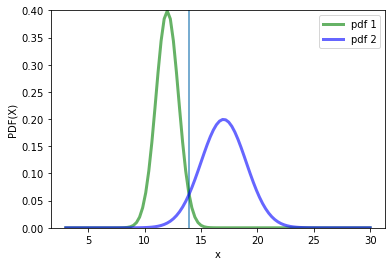

In [92]:
x=np.linspace(3, 30, 100)
_, f1, f2 = pdf(x, mean1 = 12, mean2 = 17, desv1 = 1, desv2 = 2)
f1 = stats.norm(loc = mean1, scale = desv1)
f2 = stats.norm(loc = mean2, scale = desv2)
index_min = np.argmin(abs(f2.pdf(x)-f1.pdf(x))[25:60])
f_min = min(abs(f2.pdf(x)-f1.pdf(x))[25:60])
print(f"index min: {index_min}, function min: {f_min}")
xmin_=x[25+index_min]
plt.vlines(xmin_, 0, 1, alpha=0.8)
plt.ylim(0,0.4)
plt.legend()
print("frontera en x: %0.2f"%xmin_)

### Variando el parámetro m

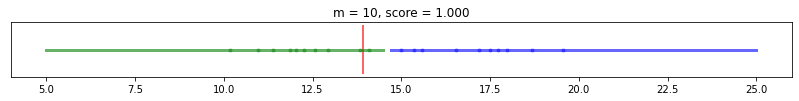

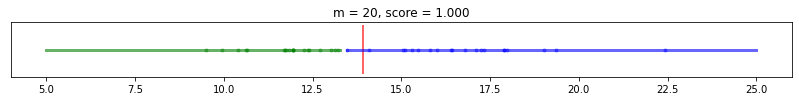

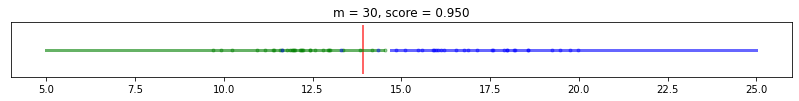

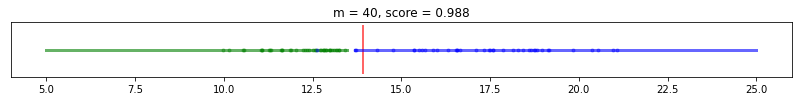

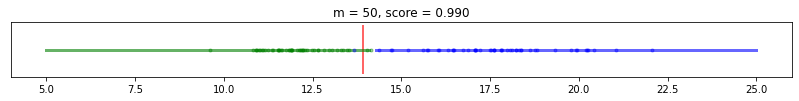

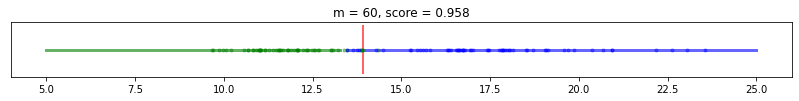

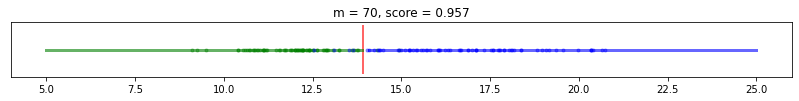

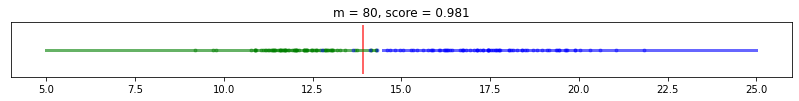

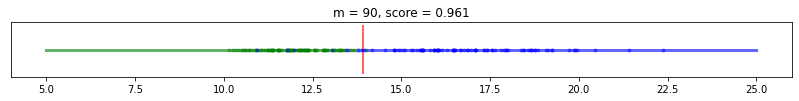

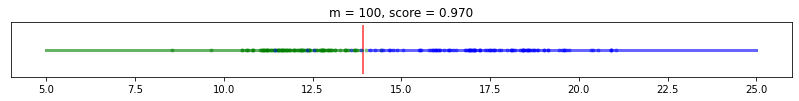

In [100]:
#valores m a usar
m = np.arange(10, 110, 10)

for m_ in m:
    X, y = train_values(m_, mean1, mean2, desv1, desv2)
    #tambien mostramos el score.
    yr, score = main(X, y, Xr)
    plt.figure(figsize=(14,1))
    plt.vlines(xmin_, -1, 1, "r", alpha=0.8)
    plt.plot(Xr[yr==0], np.zeros(len(Xr[yr==0]) ), color="g", alpha=0.6, lw=3 )  # GRaficando la prediccion para el conjunto de datos, para los de tipo 0
    plt.plot(Xr[yr==1], np.zeros(len(Xr[yr==1]) ), color="b", alpha=0.6, lw =3 ) #  GRaficando la prediccion para el conjunto de datos, para los de tipo 1
    plt.plot(X[y==0],np.zeros(m_),"g.", alpha = 0.4) # Valores aleatorios # Valores de entrenamiento
    plt.plot(X[y==1],np.zeros(m_),"b.", alpha = 0.4)                      # Valores de test
    plt.yticks([])
    plt.title("m = %d, score = %0.3f"%(m_, score))
    plt.show()

Notamos que si se aumenta el m desde pocos datos (10) hasta muchos (100), el score disminuye. La posible razón de esto es que al aumentar datos, aumenta la probabilidad de que el algoritmo cometa errores, y más considerando que habrán más valores en la región común de ambas características o cerca a la frontera entre ambas.

### m = 100 (fijo), varias corridas

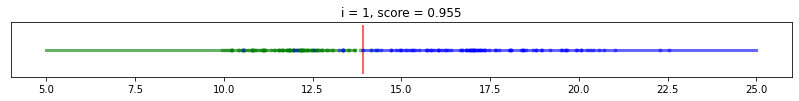

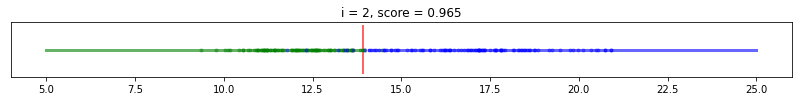

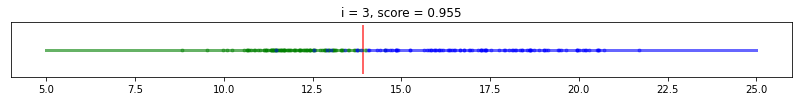

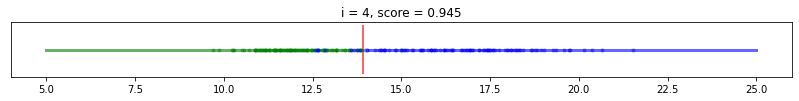

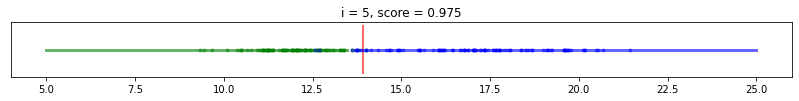

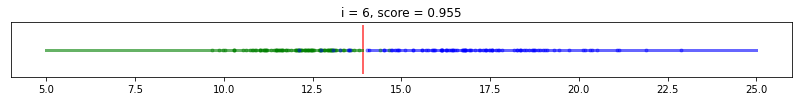

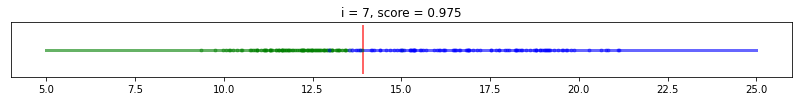

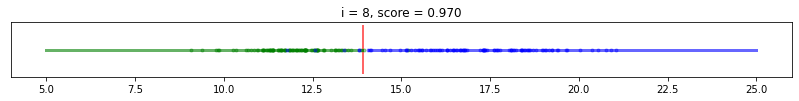

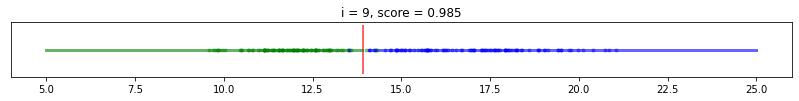

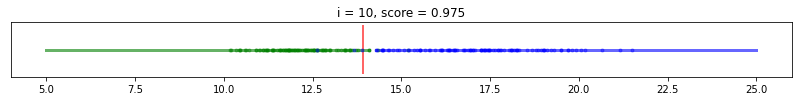

Average of scores 0.965


In [101]:
#valor fijo de m
m = 100
#se muestra un promedio al final
score_avg = 0
#se corre 10 veces
for i in range(10):
    X, y = train_values(m, mean1, mean2, desv1, desv2)
    yr, score = main(X, y, Xr)
    plt.figure(figsize=(14,1))
    plt.vlines(xmin_, -1, 1, "r", alpha=0.8)
    plt.plot(Xr[yr==0], np.zeros(len(Xr[yr==0]) ), color="g", alpha=0.6, lw=3 )  # GRaficando la prediccion para el conjunto de datos, para los de tipo 0
    plt.plot(Xr[yr==1], np.zeros(len(Xr[yr==1]) ), color="b", alpha=0.6, lw =3 ) #  GRaficando la prediccion para el conjunto de datos, para los de tipo 1
    plt.plot(X[y==0],np.zeros(m),"g.", alpha = 0.4) # Valores aleatorios # Valores de entrenamiento
    plt.plot(X[y==1],np.zeros(m),"b.", alpha = 0.4)                      # Valores de test
    plt.yticks([])
    plt.title("i = %d, score = %0.3f"%(i+1, score))
    score_avg+=score
    plt.show()
print("Average of scores %0.3f"%(score_avg/10))

Al ser los datos de las características generados de manera aleatoria, es de esperarse algunas variaciones entre corridas, sin embargo, podemos ver que en general el score se mantiene cerca de su valor promedio. 

### La media de la característica 2 aumenta progresivamente de 12 (muy cerca) a 30 (muy alejadas), con demás parámetros fijos.

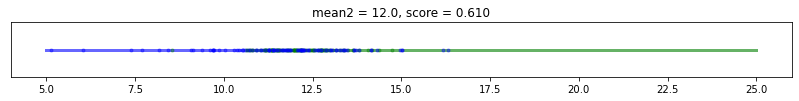

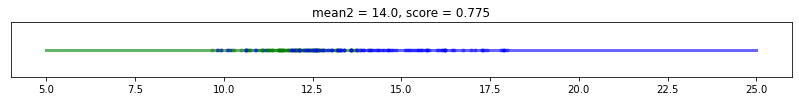

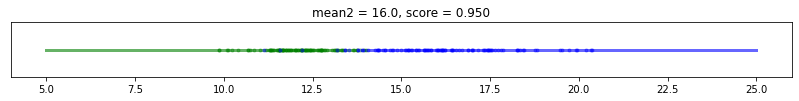

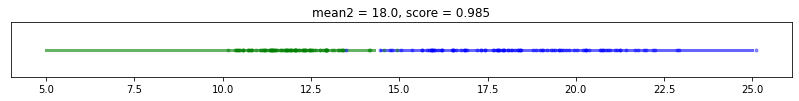

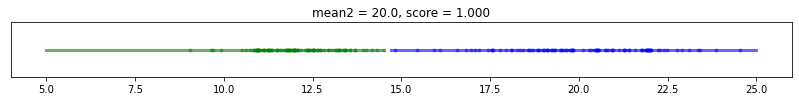

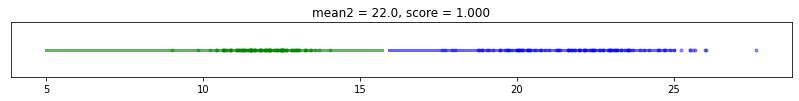

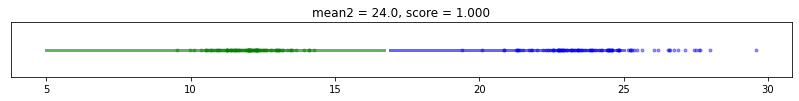

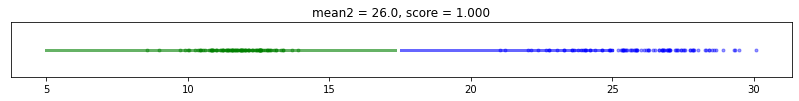

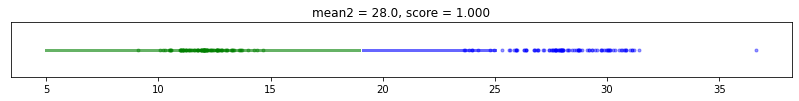

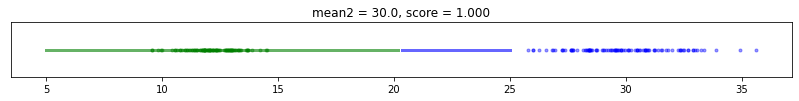

In [67]:
#arreglo con las medias a usar
mean2_arr = np.linspace(12, 30, 10)
m = 100
for mean2_ in mean2_arr:
    X, y = train_values(m, mean1, mean2_, desv1, desv2)
    yr, score = main(X, y, Xr)
    plt.figure(figsize=(14,1))
    plt.plot(Xr[yr==0], np.zeros(len(Xr[yr==0]) ), color="g", alpha=0.6, lw=3 )  # GRaficando la prediccion para el conjunto de datos, para los de tipo 0
    plt.plot(Xr[yr==1], np.zeros(len(Xr[yr==1]) ), color="b", alpha=0.6, lw =3 ) #  GRaficando la prediccion para el conjunto de datos, para los de tipo 1
    plt.plot(X[y==0],np.zeros(m),"g.", alpha = 0.4) # Valores aleatorios # Valores de entrenamiento
    plt.plot(X[y==1],np.zeros(m),"b.", alpha = 0.4)                      # Valores de test
    plt.yticks([])
    plt.title("mean2 = %0.1f, score = %0.3f"%(mean2_, score))
    plt.show()
    

Cuando los datos están muy cerca, es difícil diferenciar con tan solo una variable entre ambas categorías, por tanto, es de esperar que el algoritmo no haga buenas predicciones. Notamos que a medida que se alejan los datos, aumenta el score, y cuando están muy alejados, el algoritmo puede discernir con total precisión entre ambas características.

### Analicemos ahora ambos extremos por separado variando m

#### Medias cercanas

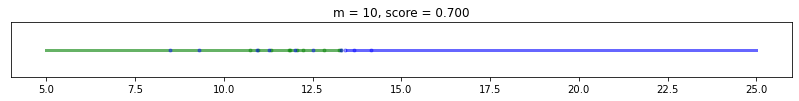

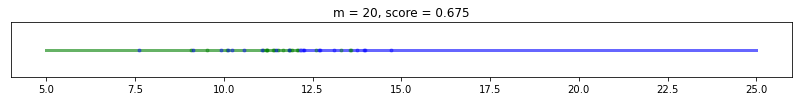

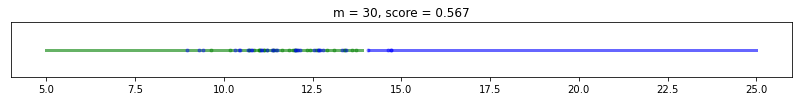

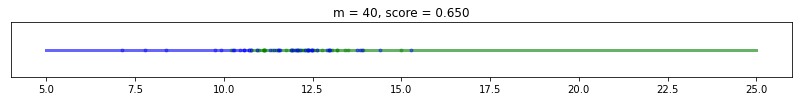

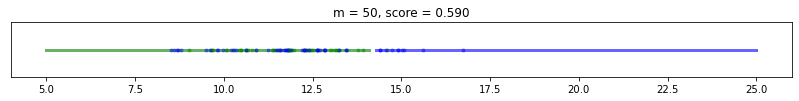

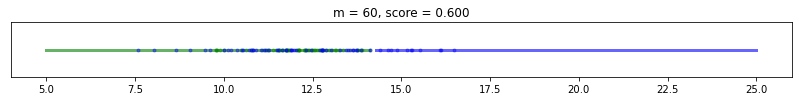

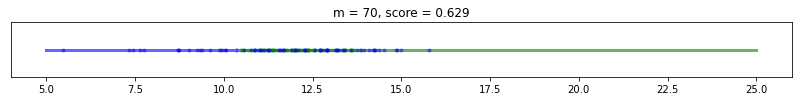

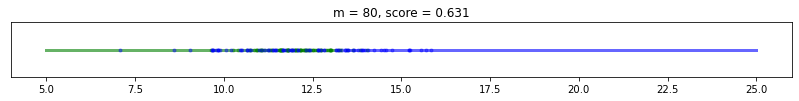

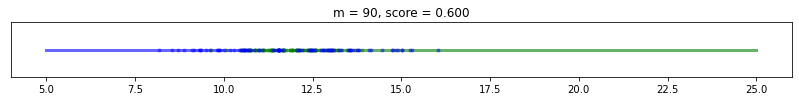

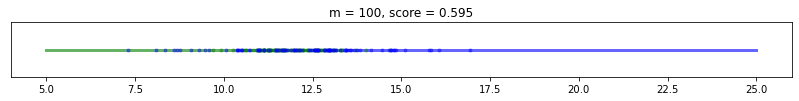

In [75]:
m = np.arange(10, 110, 10)

for m_ in m:
    #se aumenta la segunda media en un pequenno valor
    X, y = train_values(m_, mean1, mean1+0.01, desv1, desv2)
    yr, score = main(X, y, Xr)
    plt.figure(figsize=(14,1))
    plt.plot(Xr[yr==0], np.zeros(len(Xr[yr==0]) ), color="g", alpha=0.6, lw=3 )  # GRaficando la prediccion para el conjunto de datos, para los de tipo 0
    plt.plot(Xr[yr==1], np.zeros(len(Xr[yr==1]) ), color="b", alpha=0.6, lw =3 ) #  GRaficando la prediccion para el conjunto de datos, para los de tipo 1
    plt.plot(X[y==0],np.zeros(m_),"g.", alpha = 0.4) # Valores aleatorios # Valores de entrenamiento
    plt.plot(X[y==1],np.zeros(m_),"b.", alpha = 0.4)                      # Valores de test
    plt.yticks([])
    plt.title("m = %d, score = %0.3f"%(m_, score))
    plt.show()

Cuando son pocos datos, mejora sustancialmente la predicción al estar las medias muy cerca. Sin embargo, es claro que rapidamente pierde capacidad predictiva tras aumentar un poco los datos.

#### Medias alejadas

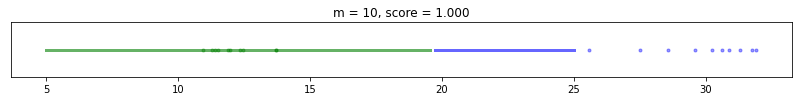

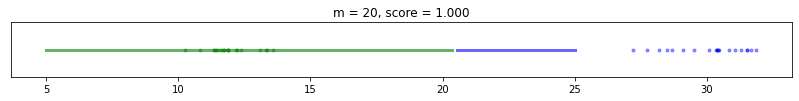

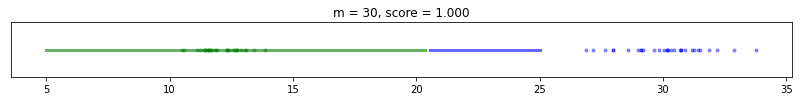

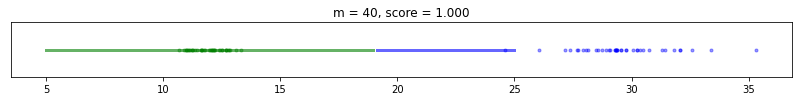

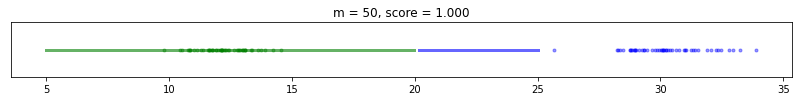

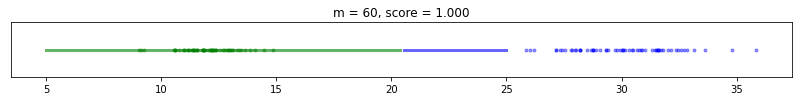

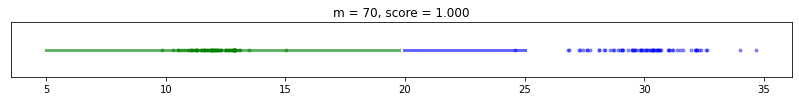

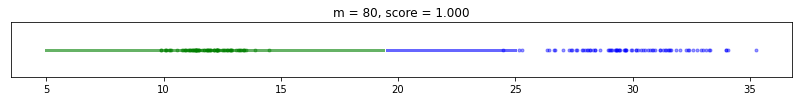

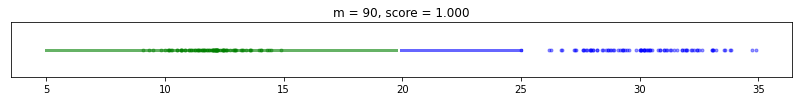

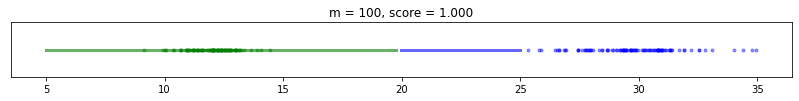

In [77]:
m = np.arange(10, 110, 10)

for m_ in m:
    X, y = train_values(m_, mean1, 30, desv1, desv2)
    yr, score = main(X, y, Xr)
    plt.figure(figsize=(14,1))
    plt.plot(Xr[yr==0], np.zeros(len(Xr[yr==0]) ), color="g", alpha=0.6, lw=3 )  # GRaficando la prediccion para el conjunto de datos, para los de tipo 0
    plt.plot(Xr[yr==1], np.zeros(len(Xr[yr==1]) ), color="b", alpha=0.6, lw =3 ) #  GRaficando la prediccion para el conjunto de datos, para los de tipo 1
    plt.plot(X[y==0],np.zeros(m_),"g.", alpha = 0.4) # Valores aleatorios # Valores de entrenamiento
    plt.plot(X[y==1],np.zeros(m_),"b.", alpha = 0.4)                      # Valores de test
    plt.yticks([])
    plt.title("m = %d, score = %0.3f"%(m_, score))
    plt.show()

Sin importar el valor de m, siempre hay una predicción del 100%, lo cual es evidente al no tener las distribuciones una zona común.